In [0]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import seaborn as sns
%matplotlib inline
import nltk
from collections import Counter

**Data Exploration**

To begin, you should always take a quick look at the data and get a feel for its contents. To do so, use a Pandas DataFrame and check the shape, head and apply any necessary transformations.

In [2]:
# load data
df=pd.read_csv('fake_or_real_news.csv')
df.head(10)         

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
Unnamed: 0    6335 non-null int64
title         6335 non-null object
text          6335 non-null object
label         6335 non-null object
dtypes: int64(1), object(3)
memory usage: 198.0+ KB


In [4]:
df.shape

(6335, 4)

In [5]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [0]:
# length of titile 
df['length_title']=df['title'].apply(len)

In [0]:
# length of words in each row
df['length_text'] =df['text'].apply(len)
df.head(10)

,Unnamed: 0,title,text,label,length_title,length_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,28,7518
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,85,2646
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,43,2543
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,84,2660
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,48,1840
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE,11,13333
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,73,3171
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,33,783
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,63,13863
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,71,4296


In [0]:
# total number of words in text and title
print('Total no. of words in text',df['length_text'].sum())
print('Total no. of words in title',df['length_title'].sum())

Total no. of words in text 29820431
Total no. of words in title 413534


In [0]:
df['length_title'].describe()

count    6335.000000
mean       65.277664
std        23.733657
min         1.000000
25%        49.000000
50%        64.000000
75%        78.000000
max       289.000000
Name: length_title, dtype: float64

In [0]:
df['length_text'].describe()

count      6335.000000
mean       4707.250355
std        5090.956446
min           1.000000
25%        1741.500000
50%        3642.000000
75%        6192.000000
max      115372.000000
Name: length_text, dtype: float64

In [0]:
# different labels in label col.
df['label'].unique()

array(['FAKE', 'REAL'], dtype=object)

In [0]:
# number of each label in data
(df['label']).value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


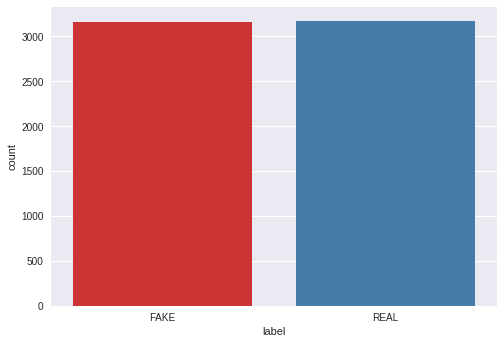

In [0]:
# plotting labels
sns.set(style="darkgrid")
sns.countplot(df['label'],palette="Set1")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


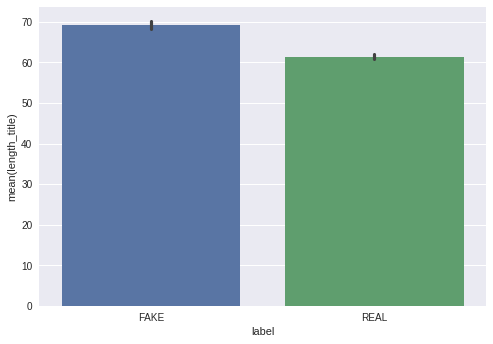

In [0]:
# plotting label with length of title
sns.barplot(x=df['label'], y=df['length_title'], data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


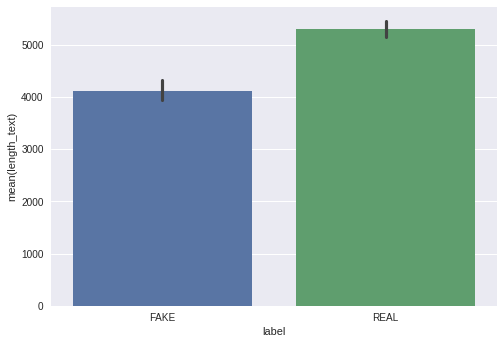

In [0]:
# plotting labels with length of text
sns.barplot(x=df['label'], y=df['length_text'], data=df)

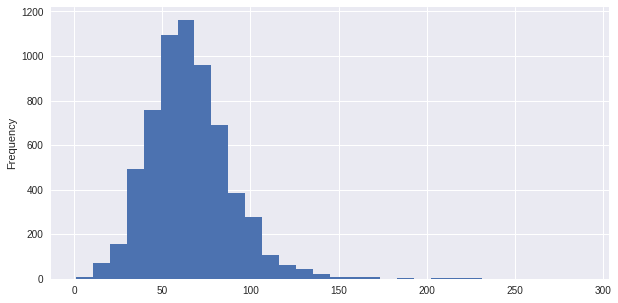

In [0]:
# plotting number of words used in data
df['length_title'].plot(bins=30,kind = 'hist',figsize = (10,5))

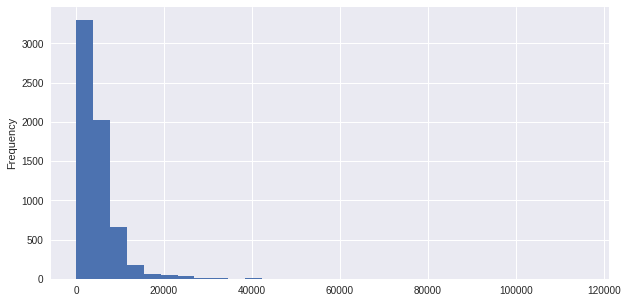

In [0]:
df['length_text'].plot(bins=30,kind = 'hist',figsize = (10,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c40d6d4a8>,
      dtype=object)

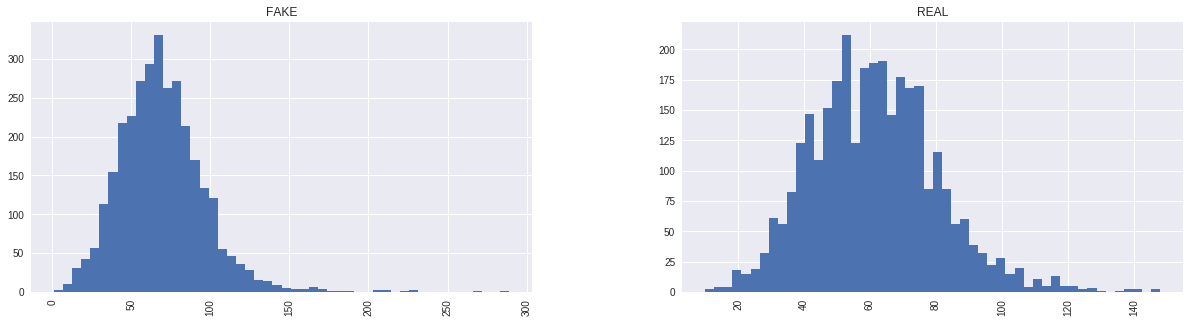

In [0]:
df.hist(column='length_title',by ='label',bins=50,figsize = (20,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c40c9a860>,
      dtype=object)

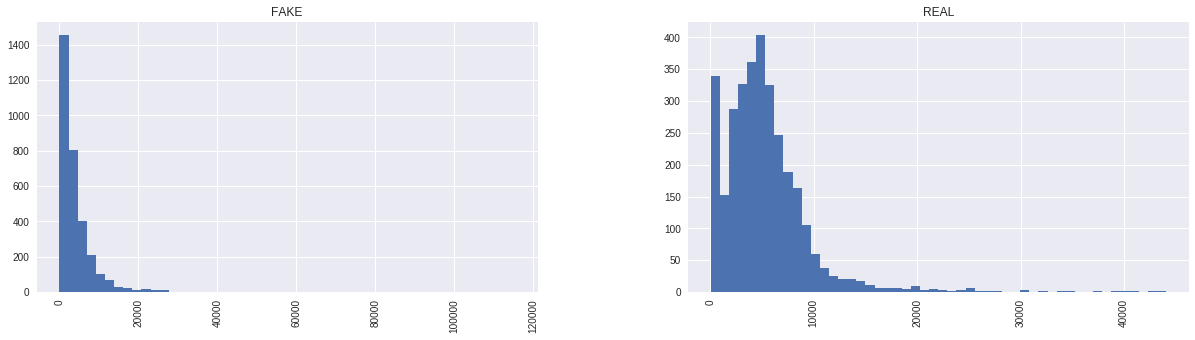

In [0]:
df.hist(column='length_text',by ='label',bins=50,figsize = (20,5))

In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Data Preprocessing**

In [0]:
import re
from string import punctuation
from nltk.corpus import stopwords
stop_list = stopwords.words('english')+['“', '’','”']

In [0]:
# Fill any blank fields
df.title.fillna("", inplace=True)
df.text.fillna("", inplace=True)

# Join the title and text
all_text = df.title.str.cat(df.text, sep=' ')

# Tokenize using nltk
words = nltk.word_tokenize(" ".join(all_text.tolist()))

In [0]:
# List of most common tokenized words
w=Counter(words)
print(w.most_common(10))

[('the', 260785), (',', 257366), ('.', 204373), ('to', 138702), ('of', 129473), ('and', 113209), ('a', 103888), ('in', 90318), ('that', 68344), ('’', 59841)]


In [0]:
len(words)  

5783722

In [0]:
# cleaning tokenize words
from nltk.corpus import stopwords
import string

cleanwords = [i for i in words if i not in (stop_list + list(punctuation)) and i.isalpha() and len(i) > 2]

In [0]:
len(cleanwords)

2745292

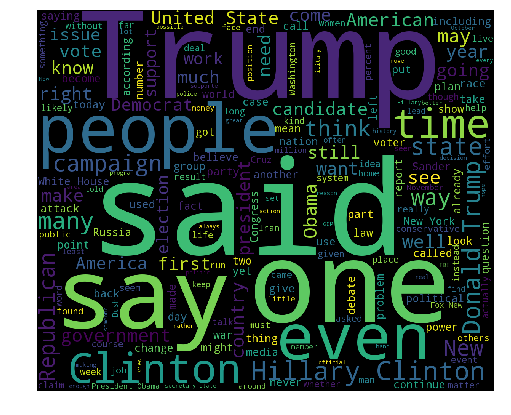

In [0]:
# words used in news 
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=1200,
                          height=1000
                         ).generate(" ".join(cleanwords))


plt.figure(figsize = (15,7))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show();

In [0]:
# checking pairs of tokenized words used in news
bigrams = nltk.bigrams(cleanwords)

In [0]:
# Most common words in text of news article
counter = Counter(bigrams)
print(counter.most_common(10))

[(('Hillary', 'Clinton'), 4519), (('Donald', 'Trump'), 4019), (('United', 'States'), 2999), (('White', 'House'), 2399), (('New', 'York'), 2171), (('President', 'Obama'), 1220), (('Fox', 'News'), 1178), (('New', 'Hampshire'), 1010), (('Supreme', 'Court'), 997), (('Barack', 'Obama'), 961)]


Most common words used in news articles

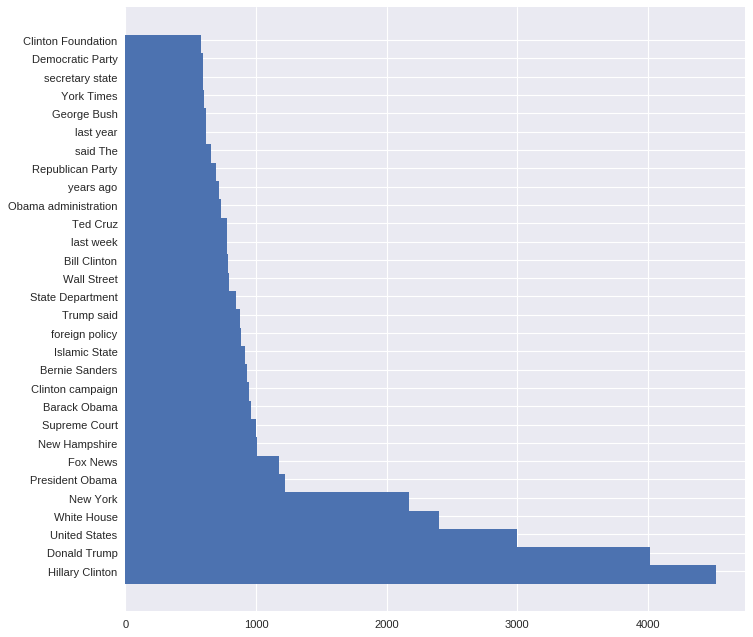

In [0]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1

#plt.bar(indexes, values, width)
#plt.xticks(indexes + width * 0.5, labels, rotation=90)
fig=plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.barh(indexes, values, width)
plt.yticks(indexes + width * 0.2, labels)
plt.show()

In [0]:
df.drop(columns=['length_title','length_text'], axis=1, inplace=True)

In [0]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [0]:
def token_lemmatize(text):
    tokens = nltk.word_tokenize(text)
    tokens= [i for i in tokens if i not in (stop_list + list(punctuation)) and i.isalpha() and len(i) > 2]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]',token):
            filtered_tokens.append(token)
    lemmatize= [wordnet_lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lemmatize

In [12]:
df['combined text'] = df.title + ' ' + df.text
df.head()

,Unnamed: 0,title,text,label,combined text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,You Can Smell Hillary’s Fear Daniel Greenfield...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Watch The Exact Moment Paul Ryan Committed Pol...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Kerry to go to Paris in gesture of sympathy U....
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Bernie supporters on Twitter erupt in anger ag...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,The Battle of New York: Why This Primary Matte...


In [0]:
df.drop(columns=['title','text'], axis=1, inplace=True)

**Splitting the data into Train and Test set**

In [0]:
y=df.label

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['combined text'], y, test_size=0.33, random_state=53)

**Building Vectorizer Classifiers**

Now that you have your training and testing data, you can build your classifiers. To get a good idea if the words and tokens in the articles had a significant impact on whether the news was fake or real, you begin by using CountVectorizer and TfidfVectorizer.

setting max threshhold  at .7 for the TF-IDF vectorizer tfidf_vectorizer using the max_df argument. This removes words which appear in more than 70% of the articles. Also, the built-in stop_words parameter will remove English stop words from the data before making vectors.


In [0]:
count_vectorizer = CountVectorizer(max_features=200000,
                                 min_df=0.1, stop_words='english',
                                  ngram_range=(1,3),tokenizer=token_lemmatize,analyzer = 'word')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [17]:
tfidf_vectorizer = TfidfVectorizer(max_features=200000,
                                  min_df=0.1,stop_words='english',
                                 use_idf=True, ngram_range=(1,3),tokenizer=token_lemmatize,analyzer = 'word')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [0]:
# first 10 features of count vectroizer
count_vectorizer.get_feature_names()[:10]

['able',
 'according',
 'act',
 'action',
 'actually',
 'added',
 'address',
 'administration',
 'agency',
 'ago']

In [0]:
# last 10 features of tfidf vectroizer
tfidf_vectorizer.get_feature_names()[-10:]

['woman',
 'word',
 'work',
 'working',
 'world',
 'wrote',
 'year',
 'year ago',
 'york',
 'young']

**Count versus TF-IDF Features**

In [0]:
t=tfidf_vectorizer.get_feature_names()
c=count_vectorizer.get_feature_names()
set(t)==set(c)

True

In [0]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
count_df.head(10)        

,able,according,act,action,actually,added,address,administration,agency,ago,...,woman,word,work,working,world,wrote,year,year ago,york,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,2,1,1,0,5,0,3,0
6,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
7,1,1,1,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,5,0
8,0,5,2,0,0,0,0,0,0,1,...,1,1,1,1,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head(10)

,able,according,act,action,actually,added,address,administration,agency,ago,...,woman,word,work,working,world,wrote,year,year ago,york,young
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.092693,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.020893,0.0,0.000000,...,0.00000,0.000000,0.034181,0.021097,0.016492,0.0,0.061875,0.000000,0.059411,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.120009,0.0,0.000000,0.0,0.114079,...,0.00000,0.000000,0.000000,0.000000,0.092749,0.0,0.069595,0.136369,0.000000,0.000000
7,0.034265,0.026770,0.033043,0.032862,0.032366,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.033413,0.000000,0.000000,0.026188,0.0,0.000000,0.000000,0.157233,0.000000
8,0.000000,0.130601,0.064481,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.031428,...,0.02993,0.032602,0.026479,0.032686,0.000000,0.0,0.000000,0.000000,0.000000,0.037518
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.072401,0.0,0.000000,0.000000,0.000000,0.000000


In [0]:
difference = set(count_df.columns) - set(tfidf_df.columns)

In [0]:
print(count_df.equals(tfidf_df))

False


# NB Model

For tf-idf vectorize

In [0]:
clf = MultinomialNB() 

In [0]:
clf.fit(tfidf_train, y_train)
pred_nb = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred_nb)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_nb)
print(cm)

accuracy:   0.820
[[869 139]
 [237 846]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

        FAKE       0.79      0.86      0.82      1008
        REAL       0.86      0.78      0.82      1083

   micro avg       0.82      0.82      0.82      2091
   macro avg       0.82      0.82      0.82      2091
weighted avg       0.82      0.82      0.82      2091



In [0]:
! pip install scikit-plot

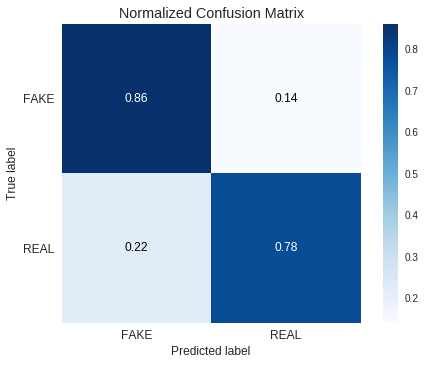

In [0]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred_nb, normalize=True)

In [0]:
# Hyperparameter tunning of NB classifier model using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':np.arange(0,1,0.1)}
nb=GridSearchCV(clf,param_grid,cv=5)
nb.fit(tfidf_train, y_train)
print('best aplha value',nb.best_params_)
print('Best score',nb.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


best aplha value {'alpha': 0.1}
Best score 0.8336475023562677


For Count vectorizer

In [0]:
clf_c = MultinomialNB() 

In [0]:
clf_c.fit(count_train, y_train)
pred_nb_c = clf_c.predict(count_test)
score = metrics.accuracy_score(y_test, pred_nb_c)
print("accuracy:   %0.3f" % score)
cm_count = metrics.confusion_matrix(y_test, pred_nb_c)

accuracy:   0.813


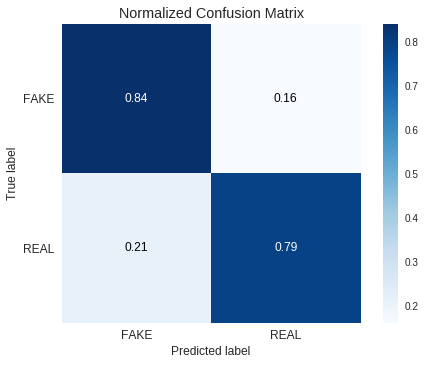

In [0]:
skplt.metrics.plot_confusion_matrix(y_test, pred_nb_c, normalize=True)

# SVM model

tfidf vectorizer

In [0]:
from sklearn.svm import  LinearSVC
svc_tfidf_clf = LinearSVC()
svc_tfidf_clf.fit(tfidf_train, y_train)
pred_svm = svc_tfidf_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred_svm)
print("accuracy:   %0.3f" % score)                                                

accuracy:   0.855


In [0]:
cm= metrics.confusion_matrix(y_test, pred_svm)
cm

array([[870, 138],
       [166, 917]])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

        FAKE       0.84      0.86      0.85      1008
        REAL       0.87      0.85      0.86      1083

   micro avg       0.85      0.85      0.85      2091
   macro avg       0.85      0.85      0.85      2091
weighted avg       0.86      0.85      0.85      2091



count vectorizer

In [0]:
svc_count_clf = LinearSVC()
svc_count_clf.fit(count_train, y_train)
pred_svm_c = svc_count_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred_svm_c)
print("accuracy:   %0.3f" % score)

accuracy:   0.831


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
cm= metrics.confusion_matrix(y_test, pred_svm_c)
cm

array([[886, 122],
       [231, 852]])

In [0]:
print(classification_report(y_test, pred_svm_c))

              precision    recall  f1-score   support

        FAKE       0.79      0.88      0.83      1008
        REAL       0.87      0.79      0.83      1083

   micro avg       0.83      0.83      0.83      2091
   macro avg       0.83      0.83      0.83      2091
weighted avg       0.84      0.83      0.83      2091



Till now SVM model has performed better than NB Classifier with Tfidf vectorizer than count vectorizer resulting in improved f1-score

In [0]:
from sklearn.svm import SVC
model = SVC()
param_grid = {'C':np.logspace(-3, 2, 6),'gamma':np.logspace(-3, 2, 6), 'kernel':['linear','rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)          
grid.fit(tfidf_train, y_train)
print('best parameter',nb.best_params_)
print('Best score',nb.best_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .............. C=0.001, gamma=0.001, kernel=linear, total=   8.5s
[CV] C=0.001, gamma=0.001, kernel=linear .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.3s remaining:    0.0s


[CV] .............. C=0.001, gamma=0.001, kernel=linear, total=   9.1s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] .............. C=0.001, gamma=0.001, kernel=linear, total=   8.6s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total=   8.8s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total=   8.8s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] ................. C=0.001, gamma=0.001, kernel=rbf, total=   8.7s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] ............... C=0.001, gamma=0.01, kernel=linear, total=   8.6s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] ............... C=0.001, gamma=0.01, kernel=linear, total=   8.6s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed: 40.2min finished


best parameter {'alpha': 0.1}
Best score 0.8336475023562677


**Linear Models** 

tfidf vectorizer

In [0]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)

In [21]:
linear_clf.fit(tfidf_train, y_train)
pred_l = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred_l)
print("accuracy:   %0.3f" % score)
cm_linear = metrics.confusion_matrix(y_test, pred_l)

accuracy:   0.850


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [0]:
cm_linear

array([[860, 148],
       [168, 915]])

In [0]:
print(metrics.classification_report(y_test, pred_l))

              precision    recall  f1-score   support

        FAKE       0.84      0.85      0.84      1008
        REAL       0.86      0.84      0.85      1083

   micro avg       0.85      0.85      0.85      2091
   macro avg       0.85      0.85      0.85      2091
weighted avg       0.85      0.85      0.85      2091



count vectorizer

In [0]:
linear_clf.fit(count_train, y_train)
pred_l_c = linear_clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred_l_c)
print("accuracy:   %0.3f" % score)
cm_linear = metrics.confusion_matrix(y_test, pred_l_c)

accuracy:   0.785


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [0]:
cm_linear

array([[891, 117],
       [332, 751]])

In [0]:
print(metrics.classification_report(y_test, pred_l_c))

              precision    recall  f1-score   support

        FAKE       0.73      0.88      0.80      1008
        REAL       0.87      0.69      0.77      1083

   micro avg       0.79      0.79      0.79      2091
   macro avg       0.80      0.79      0.78      2091
weighted avg       0.80      0.79      0.78      2091



Above models have shown that count vectorizer is giving less accuracy and f1-score than tf-idf vectorizer, also using count vectorizer models are predicting more false fake i.e; predicting real news as fake news. Therefore, tfidf vectorizer is trained further for other models

**RandomForest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced')  
model = clf1.fit(tfidf_train, y_train)
predict = model.predict(tfidf_test)
proba = model.predict_proba(tfidf_test)
score = metrics.accuracy_score(y_test, predict)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, predict)
print(metrics.classification_report(y_test, predict))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy:   0.836
              precision    recall  f1-score   support

        FAKE       0.79      0.91      0.84      1008
        REAL       0.90      0.77      0.83      1083

   micro avg       0.84      0.84      0.84      2091
   macro avg       0.84      0.84      0.84      2091
weighted avg       0.84      0.84      0.84      2091



In [0]:
cm

array([[913,  95],
       [248, 835]])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


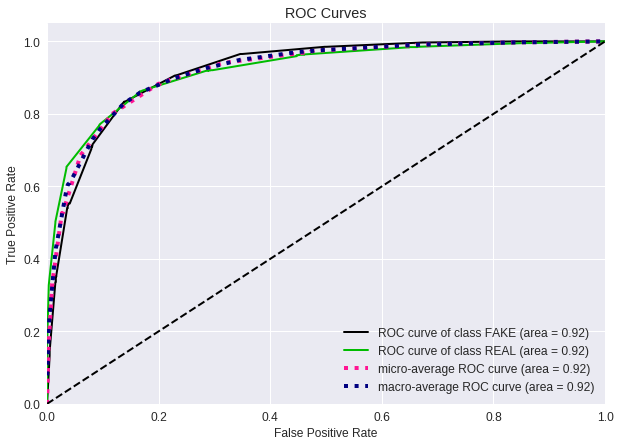

In [0]:
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test, proba,figsize=(10,7))
plt.show()

**XGBoost**

In [0]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [0]:
model3 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [0]:
from sklearn.model_selection import GridSearchCV

param_test = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
                       min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
                       objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test,n_jobs=4,iid=False, cv=5)

train_model4 = gsearch.fit(tfidf_train, y_train)
pred4 = train_model4.predict(tfidf_test)
print("Accuracy for model 4: %.2f" % (accuracy_score(y_test, pred4)))

Accuracy for model 4: 0.90


In [0]:
cm = metrics.confusion_matrix(y_test, pred4)
cm

array([[926,  82],
       [135, 948]])

 XGBoost gave the best acuracy score and best f1-score, predicting only 135 real news as Fake news and 926 correctly as Fake news which is better than other models as shown in confusion matrix above.

In [0]:
print(metrics.classification_report(y_test, pred4))

              precision    recall  f1-score   support

        FAKE       0.87      0.92      0.90      1008
        REAL       0.92      0.88      0.90      1083

   micro avg       0.90      0.90      0.90      2091
   macro avg       0.90      0.90      0.90      2091
weighted avg       0.90      0.90      0.90      2091



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


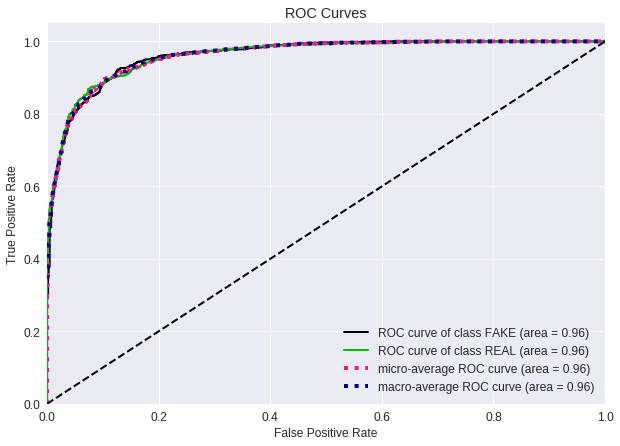

In [0]:
proba_tfidf = train_model4.predict_proba(tfidf_test)
skplt.metrics.plot_roc_curve(y_test, proba_tfidf,figsize=(10,7))
plt.show()

# Hashing Vectorizier

In [0]:
hash_vectorizer = HashingVectorizer(stop_words='english',ngram_range=(1, 3), non_negative=True,tokenizer=token_lemmatize,analyzer = 'word')
hash_train = hash_vectorizer.fit_transform(X_train)
hash_test = hash_vectorizer.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['le'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


In [0]:
clf2 = MultinomialNB(alpha=.01)

In [0]:
clf2.fit(hash_train, y_train)
pred_nb_h = clf2.predict(hash_test)
score = metrics.accuracy_score(y_test, pred_nb_h)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_nb_h)

accuracy:   0.905


In [0]:
cm

array([[ 851,  157],
       [  42, 1041]])

In [0]:
print(metrics.classification_report(y_test, pred_nb_h))

              precision    recall  f1-score   support

        FAKE       0.95      0.84      0.90      1008
        REAL       0.87      0.96      0.91      1083

   micro avg       0.90      0.90      0.90      2091
   macro avg       0.91      0.90      0.90      2091
weighted avg       0.91      0.90      0.90      2091



In [0]:
clf3 = PassiveAggressiveClassifier(n_iter=50)

In [0]:
clf3.fit(hash_train, y_train)
pred_l_h = clf3.predict(hash_test)
score = metrics.accuracy_score(y_test, pred_l_h)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_l_h)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   0.929


In [0]:
cm

array([[955,  53],
       [ 95, 988]])

In [0]:
print(metrics.classification_report(y_test, pred_l_h))

              precision    recall  f1-score   support

        FAKE       0.91      0.95      0.93      1008
        REAL       0.95      0.91      0.93      1083

   micro avg       0.93      0.93      0.93      2091
   macro avg       0.93      0.93      0.93      2091
weighted avg       0.93      0.93      0.93      2091



**SVM**

In [0]:
from sklearn.svm import  LinearSVC
svc_h_clf = LinearSVC()
svc_h_clf.fit(hash_train, y_train)
pred_hash_svm = svc_h_clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred_hash_svm)
print("accuracy:   %0.3f" % score) 

accuracy:   0.922


In [0]:
cm = metrics.confusion_matrix(y_test, pred_hash_svm)
cm

array([[962,  46],
       [118, 965]])

**RandomForest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced')  
model = clf1.fit(hash_train, y_train)
predict_hash = model.predict(hash_test)
proba = model.predict_proba(hash_test)
cm = metrics.confusion_matrix(y_test, predict_hash)
score = metrics.accuracy_score(y_test, predict_hash)
print("accuracy:   %0.3f" % score)
print(metrics.classification_report(y_test, predict_hash))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


accuracy:   0.817
              precision    recall  f1-score   support

        FAKE       0.78      0.87      0.82      1008
        REAL       0.86      0.77      0.81      1083

   micro avg       0.82      0.82      0.82      2091
   macro avg       0.82      0.82      0.82      2091
weighted avg       0.82      0.82      0.82      2091



In [0]:
cm

array([[874, 134],
       [248, 835]])

# Introspecting model

In [22]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, linear_clf, n=30)

FAKE -14.209723024911149 october
FAKE -11.696077315562624 share
FAKE -10.733886028846126 article
FAKE -9.436402569132442 november
FAKE -6.140372833125806 hillary
FAKE -5.932693269511044 entire
FAKE -5.7616771041458374 donald
FAKE -5.715250172412204 source
FAKE -4.902926841886515 ago
FAKE -4.668206879116079 read
FAKE -4.559675932090379 elected
FAKE -4.391600331887964 despite
FAKE -4.183264149742327 position
FAKE -4.131410614717187 comment
FAKE -4.046706369501734 sign
FAKE -3.8823380167665116 started
FAKE -3.847874372264988 thought
FAKE -3.732455217811045 free
FAKE -3.654344723028586 lost
FAKE -3.5946159922995182 sure
FAKE -3.508210180379523 director
FAKE -3.450163136554849 asked
FAKE -3.3830594402968064 interview
FAKE -3.2911810926103993 war
FAKE -3.283898881044687 tried
FAKE -3.2717860806683756 leave
FAKE -3.2681370767906 given
FAKE -3.104388210493819 head
FAKE -3.0494059395274995 earlier
FAKE -2.925108372849945 bring

REAL 11.100515044864359 nomination
REAL 6.509107421098581 conservat

**Conclusion**

XGBoost performed with highest accuracy and f1-score, tfidf vectorizer overshadow the count vectorizer and gave 90 % accuracy with 0.90 f1-score.
But when worked with hashing vectorizor which gave highest accuracy of about 92.9 % with PassiveAggressive Classifier.